# Guide to the "Air Safari" code project. 

The aim of this project is to complete a series of aerodynamic analyses for a defined aircraft. 
AVL is heavily used to define the aircraft geometry and its mass properties and also to perform 3D analysis. From each AVL analysis, specific data are derived and  used to compute and visualize important values either for the full aircraft or for its components. 
The **main processes** that are facilitated from the code's modules are :
* Coefficient of lift,drag,moment and stability derivatives for a specified runcase.
* Batch analysis for a given AoA RANGE for the computation of 3D CL,CD either for the full aircraft or individually for a component(wing,horizontal tail)
* Visualization of the batch analysis results 
* Derivation of strip related values for each of the aircraft components(for a specified AoA). Computation and visualization of lift and  induced drag distribution for each component.
* Derivation of viscous drag values and drag related data (i.e transition points) for each strip(viscous drag-> friction and pressure drag). Visualization of drag distribution on each aircraft component(*with the integration of xfoil) and more.

All needed data or needed analysis printout are saved in txt files. Plots are also saved. 

All modules revolve around the concept of **object oriented programming** and concepts like **classes,dataclasses,attributes,inheritance** are utilized.
All processes are part of a class and most data are  stored in sub-dataclasses. The idea is to complete all processes, save any valuable data and plots in the sub-dataclasses and later  inherit them (the most valuable)  to a properly defined main dataclass that is an Aircraft type. 

Apart from classes and dataclasses, **dictionaries have been used** in extent. The reasoning behind this choice relied on the better organization/categorization of the variables. The geometry , mass and runcase files require many variables for their definitions, dictionaries are can prove helpful since they can categorize the variables and they can also pre-map keys(variable names) to inserted/calculates values. In this way, it is easy to identify and access any variable- value pairing.

---
 


## Some words about AVL : 

AVL (Athena Vortex Lattice ) is a software developed by MIT professor Mark Drela. AVL is a command line interface (CLI) software . The software is used for **aerodynamic analysis and flight dynamic analysis** of rigid aircraft of arbitrary configuration.As 
the name states, AVL bases its calculation on the Vortex Lattice Method (**VLM**). It is a low-fidelity aerodynamic tool that uses two types of analysis that are very useful, especially in the early stage of the design. These two  types are: 
*  Aerodynamic analysis 
*  Flight Dynamic analysis/ stability

In order for AVL to work and an analysis to be made **the user must provide** three files:
*  Geometry file that contains the full definition of the aircraft (or at least all lifting surfaces)
*  Mass file that contains all mass properties (i.e component moments of inertia, weight, cg etc)
*  Runcase file that contains all data related to the analysis (i.e velocity ,AoA, density , flap angle selection etc) 

It should  be noted that AVL is **not** used for viscous drag calculation.
Since AVL is CLI-based , it can be automated.

---

The "Air Safari" code has multiple folders in order to separate its functionalities. The folders and the folder elements are shown in the pictures below. 
* **AVL combined cases** : Includes versions of .py and .ipynb modules that combine all processes and showcase the proper mode of operation of the complete code.
* **AVL data final** : Includes .py modules that are filled with data values regarding the geometry and mass properties of an aircraft , as well as the properties of the runcase scenario. 
* **AVL dataclasses** : This folder includes .py modules with dataclasses definition. Modules are categorized as general use dataclasses (found in most solver processes) and in specific-file dataclasses (found in file generation processes).
* **AVL dictionaries** : Includes all dictionaries definitions. For better organization, dictionaries have been separated based on the file that they correlate (i.e for geometry file and sub-categorized for horizontal tail, main wing etc).
* **AVL file generation** : Includes modules that facilitate each file generation.
* **AVL properties calculations**: Includes all the modules that perform calculations of certain characteristics (i.e inertia, mass, geometry related values etc).
* **AVL solver processes**: Includes all the modules that perform a specific process like the one mentioned previously( i.e batch analysis,lift distribution derivation etc).
* **AVL templates**: Includes the basic templates/ structures of the three files required for an analysis execution. 

---


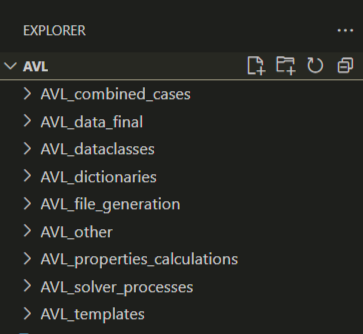 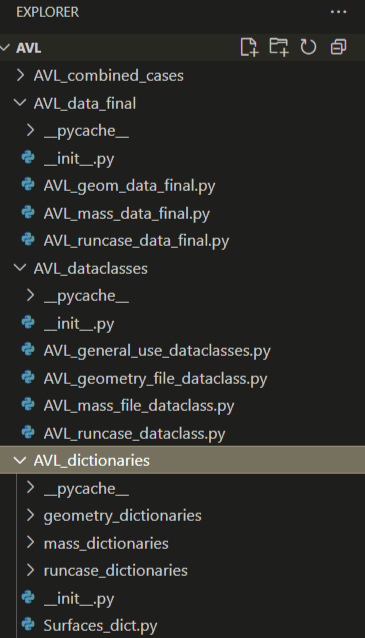 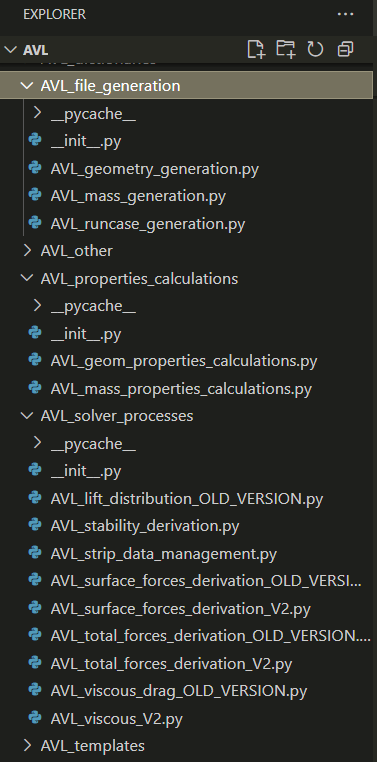

Before showing the complete automation module , some details should be provided for the dataclasses. The role of each daraclass and the computation of their attributes will be explained.
  
*  **Geometry file Dataclass** :  The attributes of this dataclass consist of geometry characteristics. They are linked with dictionary keys regarding the geometry file. The aim of this dataclass is to set the geometry values as attributes so they can be inherited and easily accesed by other modules/functions. 
* **Mass file dataclass , runcase dataclass** : They serve a similar purpose as to the geometry file dataclass. 


* **General use dataclasses**: They are dataclasses that will operate as a "container". Data are going to be stored and organized properly so they can be accessed, manipulated and later inherited to the main object(the aircraft).

     * **StabilityData Dataclass**: Attributes represent stability derivatives and specific aerodynamic outputs of an analysis for an AoA. The attribute values will be calculated from the process "AVL_stability_derivation" . From this process, each value is going to be computed and afterwards assigned  as attribute values of the StabilityData dataclass. In this way , the dataclass will be filled with the current data and serve as a "data container". 
     * **StripData Dataclass**: Attributes of this dataclass refer to arrays filled with the data of each strip. Each strip has corresponding  values such as coordinates,local chord, local strip cl,local ai, local c*cl,local cdi, local cdv,local cdf,local cdp , local transition point. These values are calculated and later mapped to attributes. Calculations are derived from functions found in "AVL_strip_data_management" and "AVL_viscous" processes. (It should be noted that dataclass attributes are hinted as optional so they do not need to be filled  at once). Each dataclass will refer to the strips of a half surface.
     * **SurfaceResults Dataclass** : The previous dataclass has values for each strip of half a surface. However , each half surface corresponds to specific values of CL,CDi,CDv,CDf,CDp,surface,avg chord . These are the attributes of SurfaceResults. The outputs of functions found in "AVL_strip_data_management" and "AVL_viscous" processes are assigned to these attributes. Another "data container" is created.
     * **AeroSurfaces Dataclass** : This dataclass has attributes that are correlated to a surface. For example , the main wing will have attributes such as the uav id it belongs to, all the section relevant values (for each half surface), all the strip data of each half surface , plots regarding lift distribution and plots regarding viscous related distributions. These attributes are mostly hinted as dataclasses. An AeroSurface basically inherits all the data-attributes that have been gathered-computed for a surface (either a wing,horizontal or vertical tail).
     * **BatchData Dataclass** : BatchData attributes are batch analysis related results. Outputs of "AVL_surface_forces_derivation" and "AVL_total_forces_derivation" are assigned to BatchData attributes.
     * **Aircraft Dataclass** : This is the main dataclass that corresponds to the full aircraft data. Its attributes are the uav id ,the geometry,mass and runcase data , main wing data, horizontal tail data, batched data and stability data. These attributes are hinted as dataclasses. An aircraft object will inherit complete dataclasses that correspond to important information either in the form of strip data, surface related data or even plots. 

The initial idea and the reason for the use of OOP and dataclasses where to eventually end up with an Aircraft type object that will have as attributes, all the required information that are needed for further analysis and performance exploration. All other sub-dataclasses are "containers" that hold current data and are filled during the execution of each process. Eventually, after all attributes have been assigned, they are inherited in the Aircraft type object.
Below you can find the "AVL_general_use_dataclass" for better understanding. 

---

In [ ]:

import matplotlib.pyplot as plt 
import numpy as np 
from dataclasses import dataclass , field
from typing import Optional 
from numpy.typing import NDArray
from AVL_dataclasses.AVL_geometry_file_dataclass import GeometryFileData
from AVL_dataclasses.AVL_mass_file_dataclass import MassFileData
from AVL_dataclasses.AVL_runcase_dataclass import RunCaseFileData


@dataclass
class StabilityData:
    CLtot: float
    CDtot: float 
    Cmtot: float
    CLa: float
    Cma: float
    CYb: float
    Clb: float
    Cnb: float
    CYp: float
    Clp: float
    Cnp: float
    CLq: float
    Cmq: float
    CYr: float
    Clr: float
    Cnr: float
    

@dataclass 
class StripData: 
    strip_number: NDArray[np.float64]
    y_coords: NDArray[np.float64]
    strip_chord: NDArray[np.float64]
    strip_ccl: NDArray[np.float64]
    strip_cl: NDArray[np.float64]
    strip_ai: NDArray[np.float64]
    strip_cdi: NDArray[np.float64]
    strip_cp: NDArray[np.float64]
    strip_cdv: Optional[np.ndarray] = field(default=None)
    strip_cdf: Optional[np.ndarray] = field(default=None)  
    strip_cdp: Optional[np.ndarray] = field(default=None)
    strip_top_transition: Optional[np.ndarray] = field(default=None)
    strip_bot_transition: Optional[np.ndarray] = field(default=None)

@dataclass
class SurfaceResults:  # for half a surface
     surface_area : float
     avg_chord : float
     CLsurf : float
     CDisurf : float
     CDvsurf : Optional[float] = field(default=None)
     CDfsurf : Optional[float] = field(default=None)
     CDpsurf : Optional[float] = field(default=None)


@dataclass
class AeroSurfaces:
    name : str   # surface name/UAV ID 
    surface: str  # surface type
    section_relevant_right: SurfaceResults    #dataclass with relevant values (cl,cd,surface area etc)
    section_relevant_YDUP: SurfaceResults
    strip_data_right: StripData  #A StripData object with all the arrays needed
    strip_data_YDUP: StripData
    plot_lift: plt.Figure 
    plot_viscous: Optional[plt.figure] = field(default=None)

@dataclass 
class batch_data:
    AoA_range_total: Optional[np.ndarray] = field(default=None)
    AoA_range_wing: Optional[np.ndarray] = field(default=None)
    AoA_range_tail: Optional[np.ndarray] = field(default=None)
    batch_wing_CL: Optional[np.ndarray] = field(default=None)
    batch_wing_CDi: Optional[np.ndarray] = field(default=None)
    batch_tail_CL:  Optional[np.ndarray] = field(default=None)
    batch_tail_CDi: Optional[np.ndarray] = field(default=None)
    batch_total_CL: Optional[np.ndarray] = field(default=None)
    batch_total_CDi: Optional[np.ndarray] = field(default=None)
    plot_total_forces: Optional[plt.figure] = field(default=None)
    plot_wing_forces: Optional[plt.figure] = field(default=None)
    plot_tail_forces: Optional[plt.figure] = field(default=None)


@dataclass
class Aircraft:
    uav_id: Optional[str] = field(default=None)
    geometry_data: Optional[GeometryFileData] = field(default=None)
    mass_data: Optional[MassFileData] = field(default=None)
    runcase_data: Optional[RunCaseFileData] = field(default=None)
    main_wing_data: Optional[AeroSurfaces] = field(default=None)
    horizontal_tail_data: Optional[AeroSurfaces] = field(default=None)
    batched_data: Optional[batch_data] = field(default=None)
    stability_data: Optional[StabilityData] = field(default=None)

    

## Complete automation and example case 

The complete automation and example case are found in "AVL_automation_V2":





In [ ]:

from numpy.typing import NDArray
import os 
import matplotlib.pyplot as plt 
import sys
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), "..")))
import AVL_combined_cases.paths
from AVL_combined_cases.paths import pathing

from  AVL_dataclasses.AVL_geometry_file_dataclass import GeometryFileData 
from AVL_dataclasses.AVL_mass_file_dataclass import MassFileData
from AVL_dataclasses.AVL_runcase_dataclass import RunCaseFileData
from AVL_dataclasses.AVL_general_use_dataclasses import Aircraft,batch_data

from AVL_file_generation.AVL_geometry_generation import geometry_gen
from AVL_file_generation.AVL_mass_generation import mass_gen
from AVL_file_generation.AVL_runcase_generation import runcase_gen

from AVL_data_final.AVL_geom_data_final import geometry_data_func
from AVL_data_final.AVL_mass_data_final import mass_data_func
from AVL_data_final.AVL_runcase_data_final import runcase_data_func

from AVL_solver_processes.AVL_stability_derivation import stability_derivation 
from AVL_solver_processes.AVL_surface_forces_derivation_V2 import surface_forces_main
from AVL_solver_processes.AVL_total_forces_derivation_V2 import total_forces_main
from AVL_solver_processes.AVL_strip_data_management import strip_data_main
from AVL_solver_processes.AVL_viscous_V2 import viscous_main

class data:
  
    def __init__(self,geometry_data : GeometryFileData, mass_data: MassFileData, runcase_data :RunCaseFileData):
           self.geometry_data=geometry_data
           self.mass_data=mass_data
           self.runcase_data=runcase_data
    
    def aircraft_init(self):
       return Aircraft(uav_id=self.geometry_data.aircraft_name,geometry_data=self.geometry_data,mass_data=self.mass_data,runcase_data=self.runcase_data)


class AVLgeometry: 

    """
     A class for the generation of geometry files based on the geometry template created externally.
    """
    def __init__(self,output_path,uav_id : str, main_wing: dict,h_tail: dict, v_tail: dict):
     
        self.output_path= output_path
        self.uav_id=uav_id
        self.main_wing=main_wing
        self.h_tail=h_tail
        self.v_tail=v_tail

    #geometry file generation/geometry creation 
    def geometry_generation(self):   
        geometry_gen(self)
       
        return self.geometry_file,self.geom_file_path

class AVLmass:
    """
      A class for the generation of mass files based on the mass template created externally.
    """
    def __init__(self,output_path,uav_id: str,main_wing_mass: dict, fuselage_mass: dict, h_tail_mass: dict, v_tail_mass: dict, sporia_mass: dict):
        self.output_path= output_path
        self.uav_id=uav_id
        self.main_wing_mass=main_wing_mass
        self.fuselage_mass=fuselage_mass
        self.h_tail_mass=h_tail_mass
        self.v_tail_mass=v_tail_mass
        self.sporia_mass=sporia_mass

           # mass file generation 
    def mass_generation(self):
        mass_gen(self)
          
        return self.mass_file,self.mass_file_path

class AVLruncase:  

    """
    A class for the generation of runcase files based on the runcase template created externally.
    """

    def __init__(self,output_path,uav_id: str,flight_conditions: dict):
        self.output_path= output_path
        self.uav_id=uav_id
        self.flight_conditions=flight_conditions
  
    def runcase_file_generation(self):
        runcase_gen(self)
        return self.runcase_file, self.runcase_file_path    

class AVLsolver:
    """
    Solver: will contain all processes regarding sequences etc...
    Stability derivatives: Run avl and execute a specified analysis. Exctract the results in a txt file. From this file ,derive only the required values.
    Surface forces : Run avl and extract aerodynamic forces for the specified surface (i.e horizontal tail,main wing).
    Total forces  :Run avl and exctract aerodynamic forces for the whole aircraft geometry.
    """
      
    def __init__(self,uav_id:str,avl_exe_path, avl_path, xfoil_exe_path,output_path, geometry_file: str, mass_file: str, runcase_file: str, velocity : float,cref: float):
        self.avl_exe_path= avl_exe_path
        self.xfoil_exe_path=xfoil_exe_path
        self.uav_id=uav_id
        self.avl_path = avl_path
        self.output_path= output_path
        self.geometry_file = geometry_file
        self.mass_file = mass_file
        self.runcase_file = runcase_file
        self.velocity = velocity 
        self.cref = cref


    def stability_derivatives(self):
        stability_derivs=stability_derivation(self)

        return stability_derivs 

    
    def surface(self,AoA_range : np.ndarray,surface :str, batched_data : batch_data):
        surface_batch=surface_forces_main(self,AoA_range=AoA_range,surface=surface,batched_data=batched_data)
        
        return batched_data
    
 
    
    def total(self,AoA_range : NDArray[np.float64], batched_data: batch_data):
        aircraft_batch=total_forces_main(self,AoA_range=AoA_range ,batched_data=batched_data)
        
        
        return batched_data
             
    def strips(self,surface: str):
        surface_type=strip_data_main(self,surface)

        return surface_type    
    
    def viscous(self,main_wing,horizontal_tail):
        
        main_wing,horizontal_tail=viscous_main(self,main_wing,horizontal_tail)

        return main_wing, horizontal_tail
    
#example case

aircraft=data(geometry_data=geometry_data_func(), mass_data=mass_data_func(),runcase_data=runcase_data_func()).aircraft_init()
Output_path=pathing(geometry_data_func().aircraft_name)

test_geom_file,test_geom_path=AVLgeometry(output_path=Output_path,uav_id=aircraft.geometry_data.aircraft_name,main_wing=aircraft.geometry_data.main_wing_dict(),h_tail=aircraft.geometry_data.h_tail_dict(), v_tail=aircraft.geometry_data.v_tail_dict()).geometry_generation()
print (f"Geometry file  was created at : {test_geom_path}")


test_mass_file,test_mass_path=AVLmass(output_path=Output_path,uav_id=aircraft.mass_data.aircraft_name,main_wing_mass=aircraft.mass_data.main_wing_mass_dict(),fuselage_mass=aircraft.mass_data.fuselage_mass_dict(),h_tail_mass=aircraft.mass_data.h_tail_mass_dict(),
                            v_tail_mass=aircraft.mass_data.v_tail_mass_dict(),sporia_mass=aircraft.mass_data.sporia_mass_dict()).mass_generation()
print (f"Mass file  was created at : {test_mass_path}")

test_runcase_file,test_runcase_path=AVLruncase(output_path=Output_path,uav_id=aircraft.runcase_data.aircraft_name,flight_conditions=aircraft.runcase_data.runcase_dict()).runcase_file_generation()
print(f"Runcase file was created at : {test_runcase_path} ")

avl_cracked=AVLsolver(
        uav_id=aircraft.geometry_data.aircraft_name,
        xfoil_exe_path=AVL_combined_cases.paths.xfoil_exe_path,
        avl_exe_path=AVL_combined_cases.paths.AVL_exe_path,
        avl_path=AVL_combined_cases.paths.AVL_path,
        output_path=Output_path,
        geometry_file=test_geom_path,
        mass_file=test_mass_path,
        runcase_file=test_runcase_path,
        velocity = 25,     # make sure each constant parameter is called from an external file.,
        cref=aircraft.geometry_data.Cref
        )

analysis_file_path=os.path.join(Output_path,f"{aircraft.geometry_data.aircraft_name}_analysis.txt")
stability_derivs=avl_cracked.stability_derivatives()         # STABILITY DERIVATIVES
wing_batch=avl_cracked.surface(np.arange(0,2,1),'Main Wing',batched_data=batch_data()) # wing batch
tail_batch=avl_cracked.surface(np.arange(0,2,1),'Horizontal Tail',batched_data=wing_batch)  # horizontal tail batch
aircraft_batch=avl_cracked.total(np.arange(0,2,1),batched_data=tail_batch) # total aircraft batch 
wing=avl_cracked.strips('Main Wing')  # strip data processes for main wing 
tail=avl_cracked.strips('Horizontal tail') # strip data processes for horizontal tail 
wing,tail=avl_cracked.viscous(wing,tail)  # viscous drag computations for both main wing and horizontal tail 


# FINAL AIRCRAFT OBJECT HAS INHERITED ALL THE VALUABLE COMPUTED DATA
aircraft=Aircraft(main_wing_data=wing,horizontal_tail_data=tail,batched_data=aircraft_batch,stability_data=stability_derivs)
print(type(aircraft))

In the automation module , multiple classes have been defined. Each class contains logic that corresponds to a process completion. For example , the AVLSolver class contains all the logic relating to the processes that compute the main needed data. Each duntion included in a class , returns an output. The class functions need to be called inthe correct order because certain processes are dependant in each other.
 
**The correct order and what is derived from that order is:**
* **1 :** Initiate type aircraft object with its initial geometry , mass, runcase data which are known.
* **2 :** Initiate  the corresponding classes for  geometry,mass,runcase file generation. Output is a path and a file. 
* **3 :** Initiate an AVLSolver class with all needed inputs (i.e paths etc). After the initiation of an AVLSolver, any process can take place.
* **4 :** Run the stability derivatives process and derive all needed values.Output is a StabilityData object.
* **5 :** Run a surface batch analysis for the main wing of the aircraft.Initiate an empty BatchData type dataclass and store the derived data.
* **6 :** Run a surface batch analysis for the horizontal tail of the aircraft and as input use the previously initiated BatchData dataclass. In this way,  BatchData attributes will be assigned with the corresponding values.
* **7 :** Run a total aircraft batcch analysis and store the data in the same BatchData dataClass. After this step, the BatchData dataclass is fully filled. 
* **8 :** Run a strips process to derive all lift distribution related data for the main wing. Output is an AeroSurfaces type object that corresponds to the main wing. 
* **9 :** Run another strips process to derive all lift distribution related data for the horizontal tail. Output is an AeroSurfaces type object that corresponds to the horizontal tail.
* **10 :** Run a viscous process and use as inputs the previously created AeroSurfaces (wing,tail). Output will be two updated AeroSurfaces type objects(previous data are kept the same ans unfilled data are filled)
* **11 :** Update your Aircraft type object in order to  inherit  all the previous dataclass objects that have been fully filled.

---
 

## The outpout of "Air Safari" : 

The code will create a folder with a name identical to the Uav ID. The folder will include txt files, png files as well as the aircraft's .avl , .mass and .run files . The content of the folder is derived from the code's processes . In the picture below, an example folder is shown. The Uav ID is "Echo". 

It is important to note the path procedure that is followed. During the execution, the code requires access to AVL.exe, xfoi.exe. These executable also require the airfoils to be in the same directory or  to be input as a path. Also, each time the code is run a new folder is created. This folder has a predefined basename and a varibale-type stem. Apart from that, the code requires a sys path to work properly. 
All paths and basenames are written in an external module (called "paths") and need to be adjusted for each user. The paths that are vital is:
*  AVL exe path 
*  Xfoil exe path 
*  Airfoil database path 
*  sys path 
*  Basename of the final output path 


----


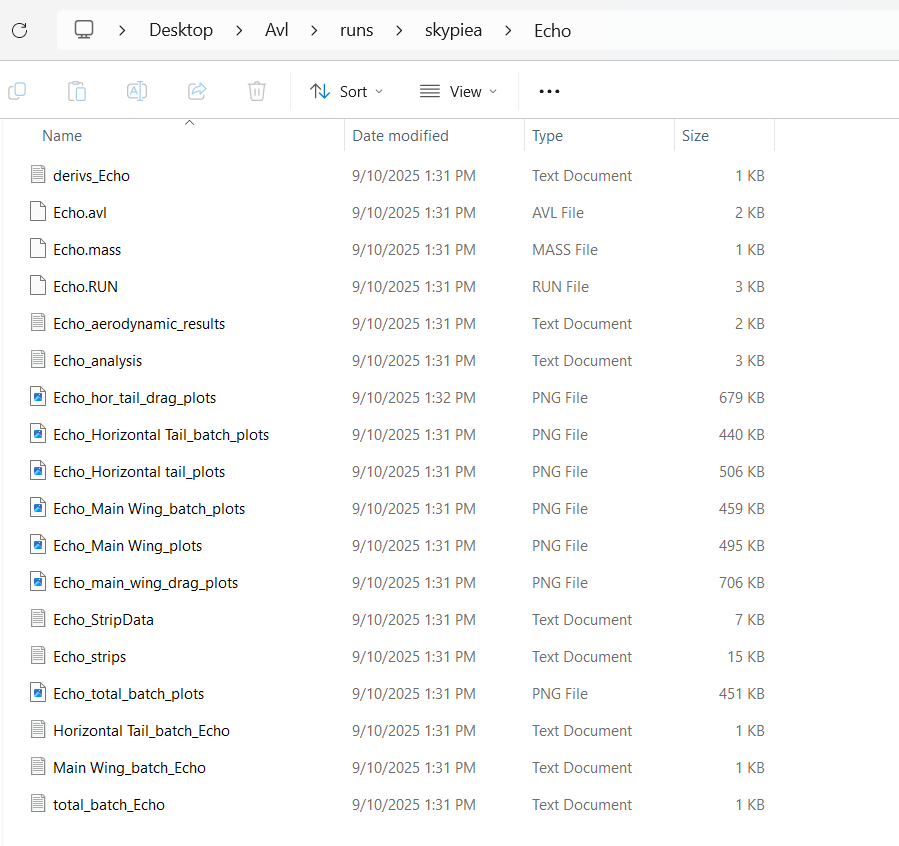

**Note:** The output containts txt files and png images. The purpose of the  txt and png files is to be accessed,read,assessed and debugged with ease by the user. All the important data exist as attributes of the aircraft object and are not accessed from the txt files or any other directory.

* **Echo.avl ==>** The .avl file of the current aircraft.  (.avl file)

* **Echo.mass ==>** The .mass file of the current aircraft. (.mass file)

* **Echo.RUN ==>** the.RUN file of the current aircraft. (.run file)

* **Echo_analysis ==>** It is the AVL analysis output for a specific AoA. It is derived during the Stability Data process and all stability data are extracted from this file. (.txt file)

* **derivs_Echo ==>** All the stability data that are needed for further (stability) analysis. (.txt file)

* **Horizontal tail_batch_Echo, Main wing_batch_Echo ==>** Output of the batch analyses for each surface. (.txt files) 

* **Echo_Horizontal_tail_batch_plots, Echo_Main_Wing_batch_plots ==>** Plots of the surface batch analyses.  (png files)

* **total_batch_Echo ==>** Output of the batch analysis for the whole aircraft .   

* **Echo_total_batch_plots ==>** Plots of the total aircraft batch analysis . (png file)

* **Echo_StripData ==>** Output of the AVL strip analysis. It is the exact output file as derived from AVL. 

* **Echo_strips ==>** All the important data from the strip analysis are organized in this txt file.

* **Echo_Horizontal_tail_plots, Echo_Main_Wing_plots ==>** Plots regarding lift distribution and induced drag. (png files)

* **Echo_hor_tail_drag_plots, Echo_main_wing_drag_plots ==>** Plots regarding viscous drag elements. (png files)

*  **Echo_aerodynamic_results ==>** Contains all the data regarding surfaces and the total aircraft. All data are concentrated,organized and properly displayed in this txt file.




Examples of the output files are shown below: 
*  Picture 1: "Echo_main_wing_plots" 
*  Picture 2: "Echo_main_wing_drag_plots"
*  Picture 3: "Echo_main_batch_plots" 
*  TXT file 1: "Echo_Aerodynamic_results"
*  TXT file 2: "Main_wing_batch_Echo"
*  TXT file 3: "derivs_Echo"

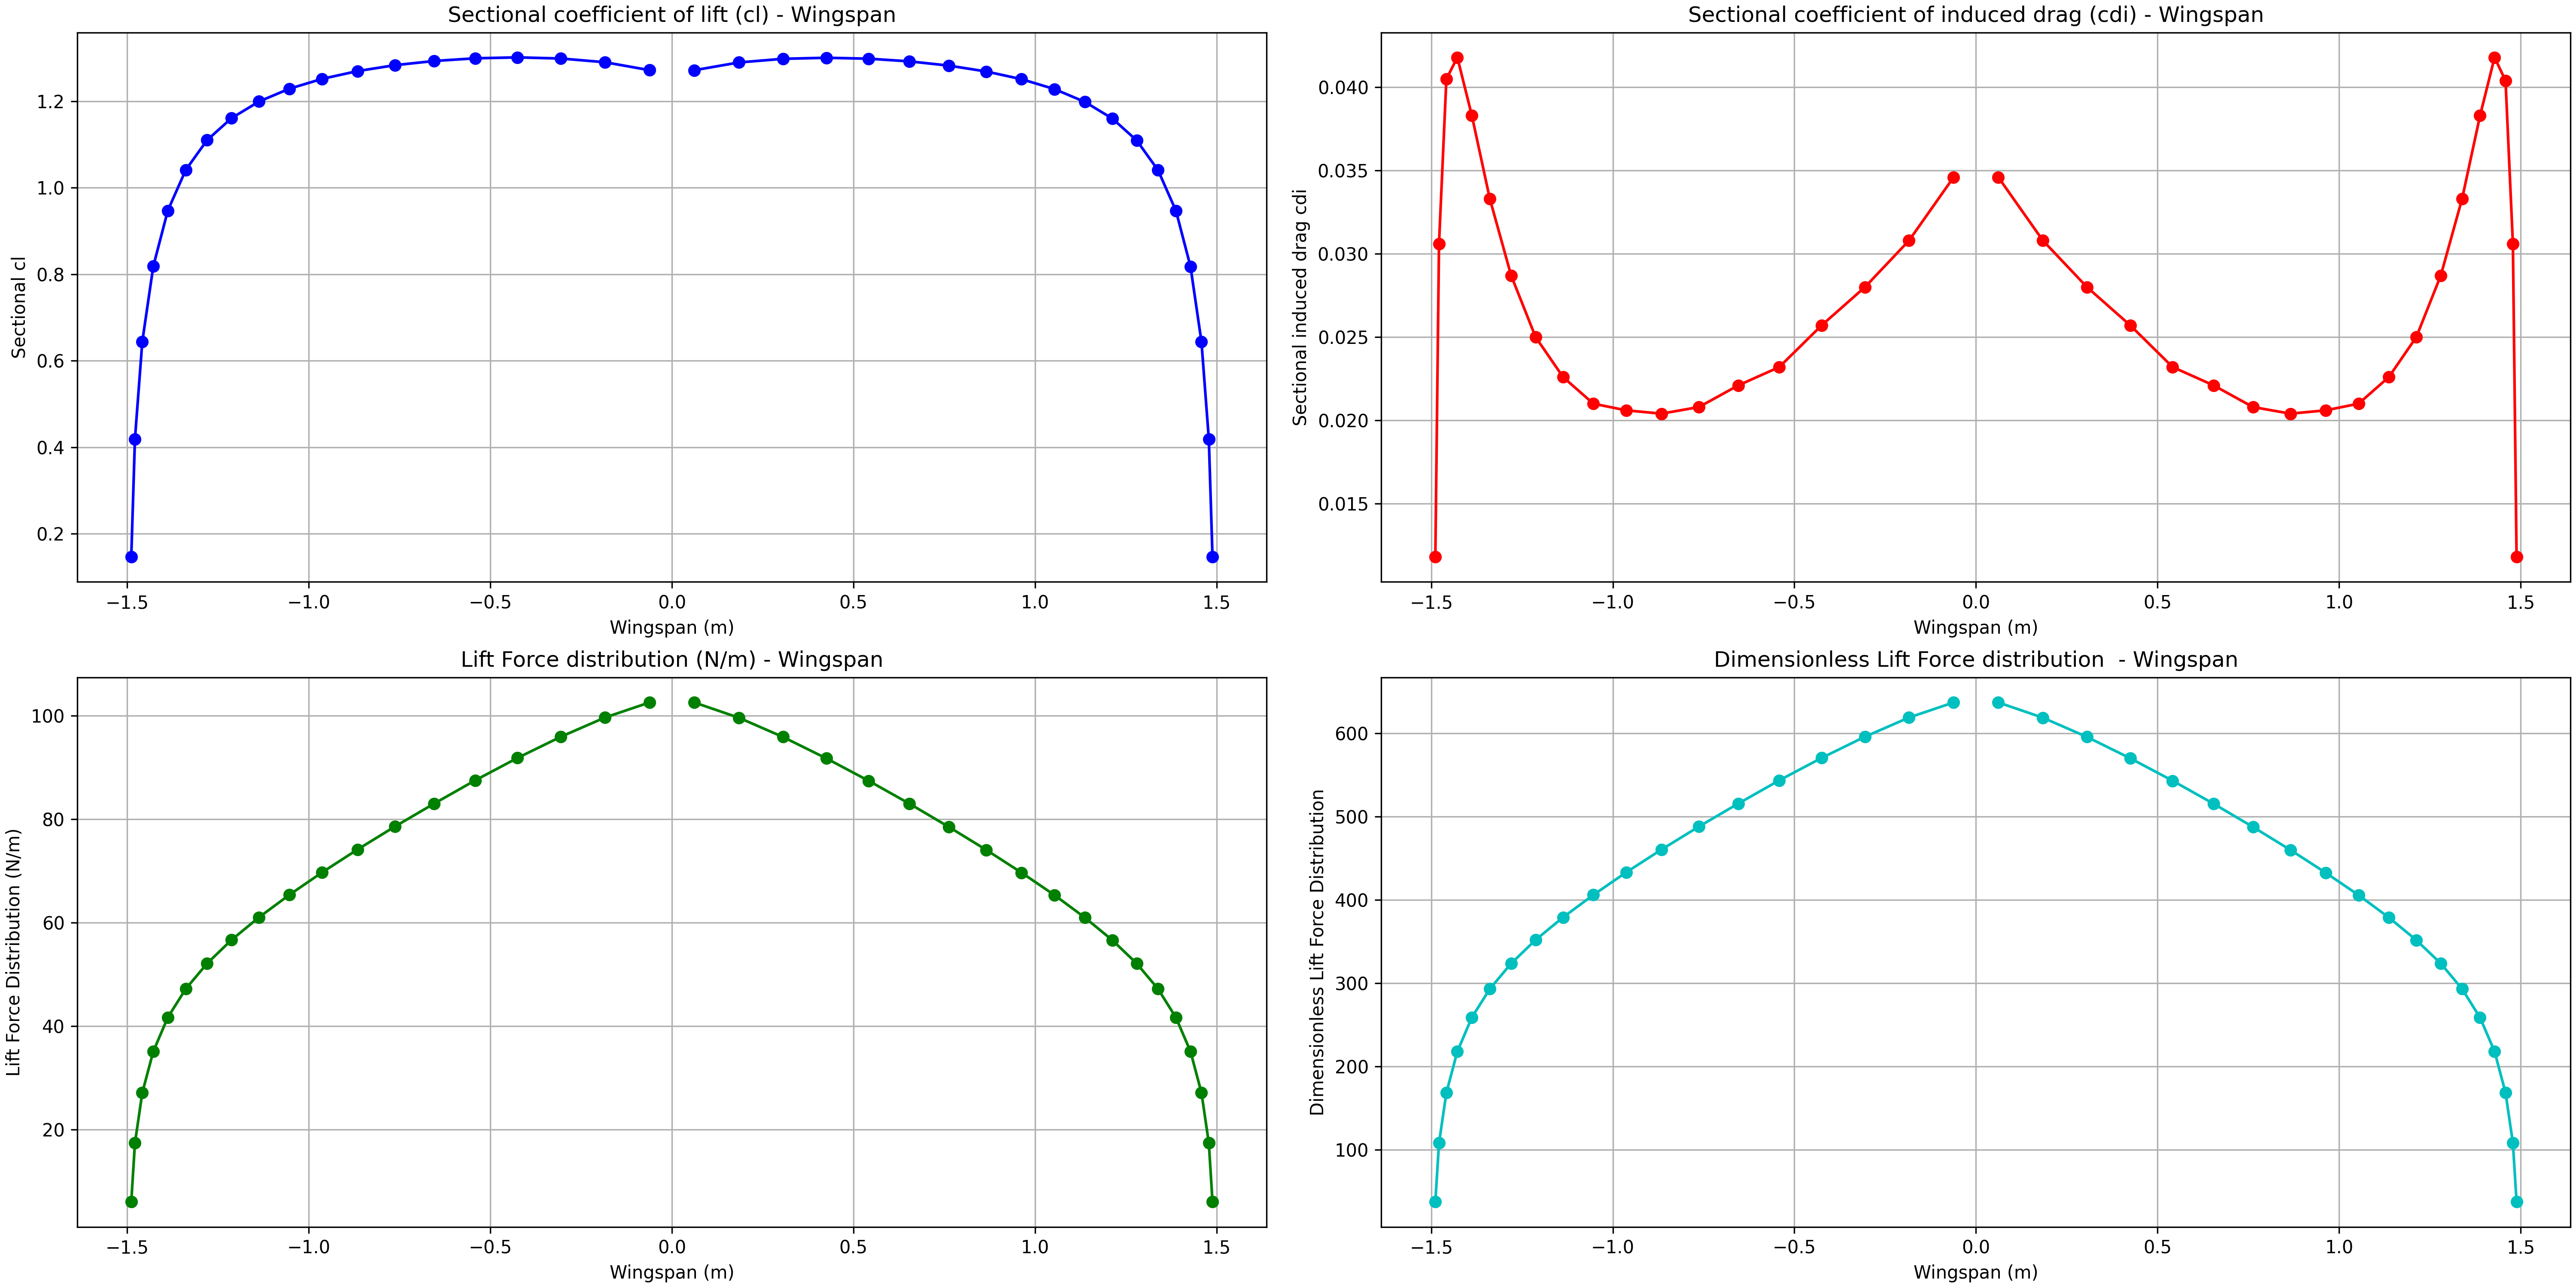

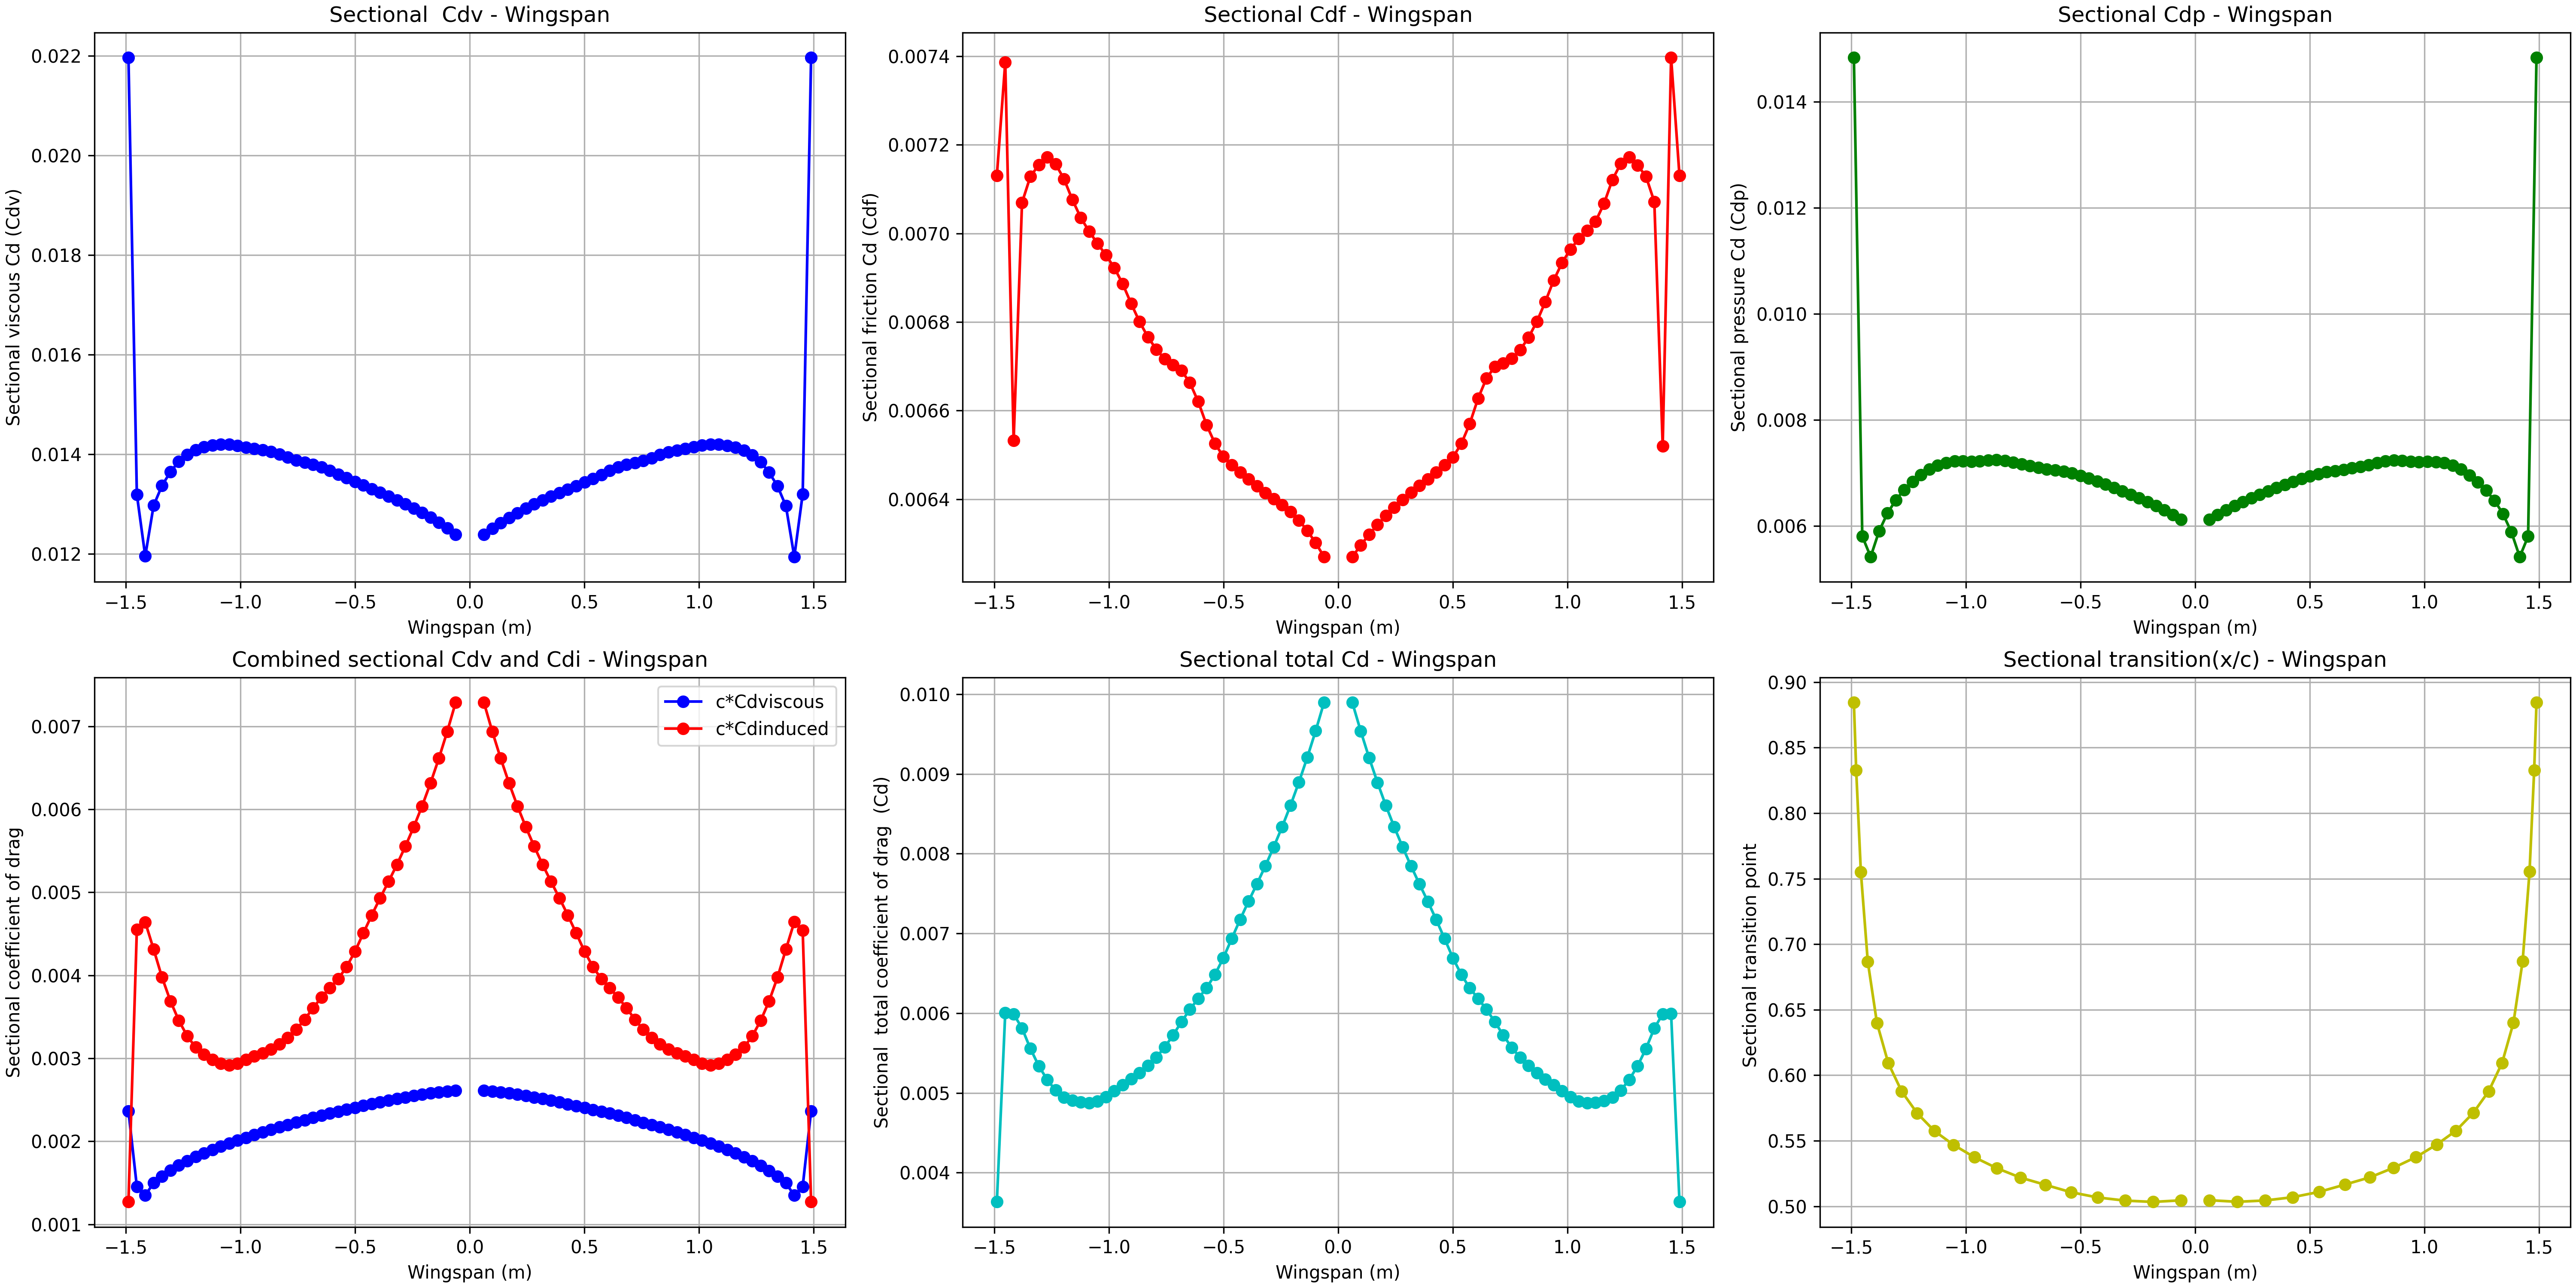

![Echo_Main Wing_batch_plots.png](<attachment:Echo_Main Wing_batch_plots.png>)

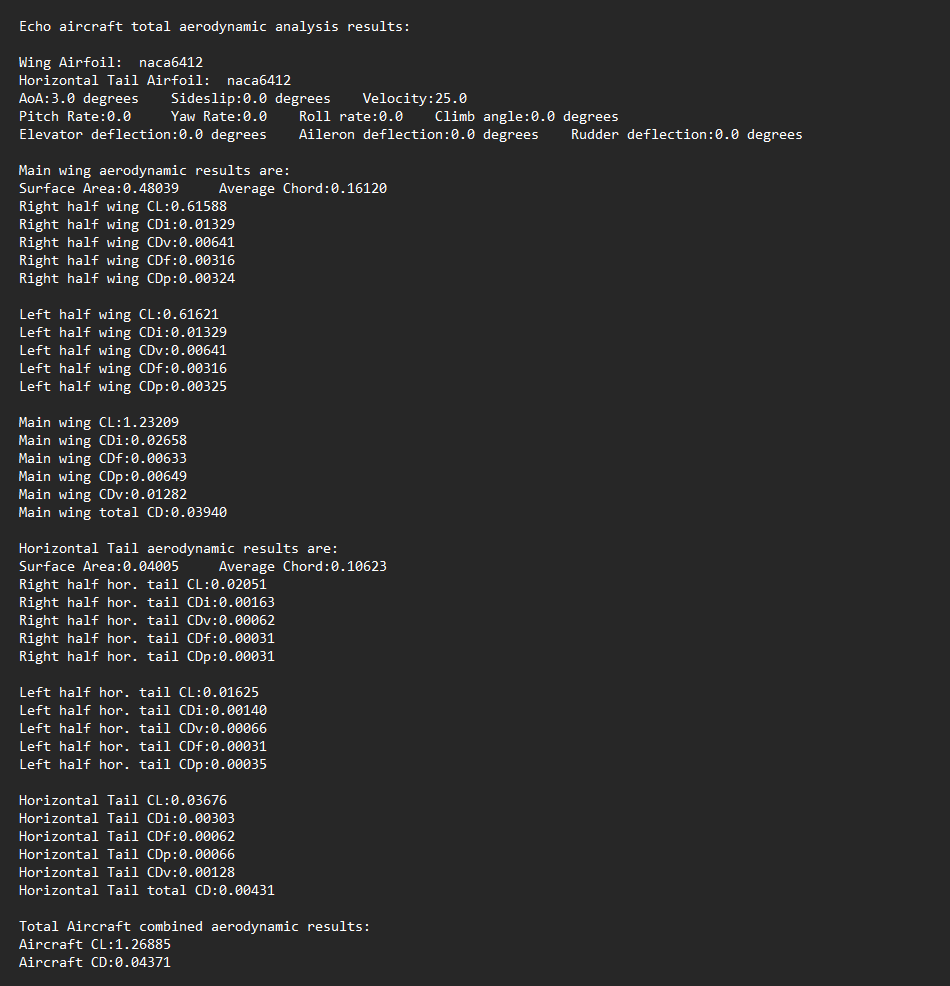

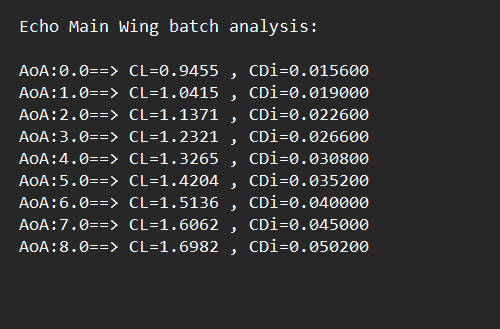

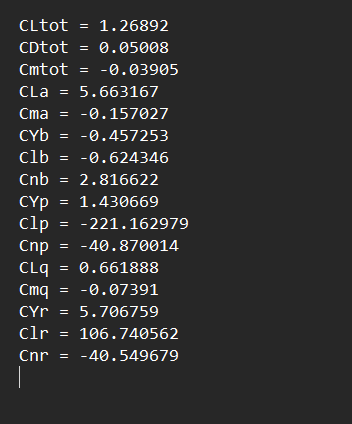





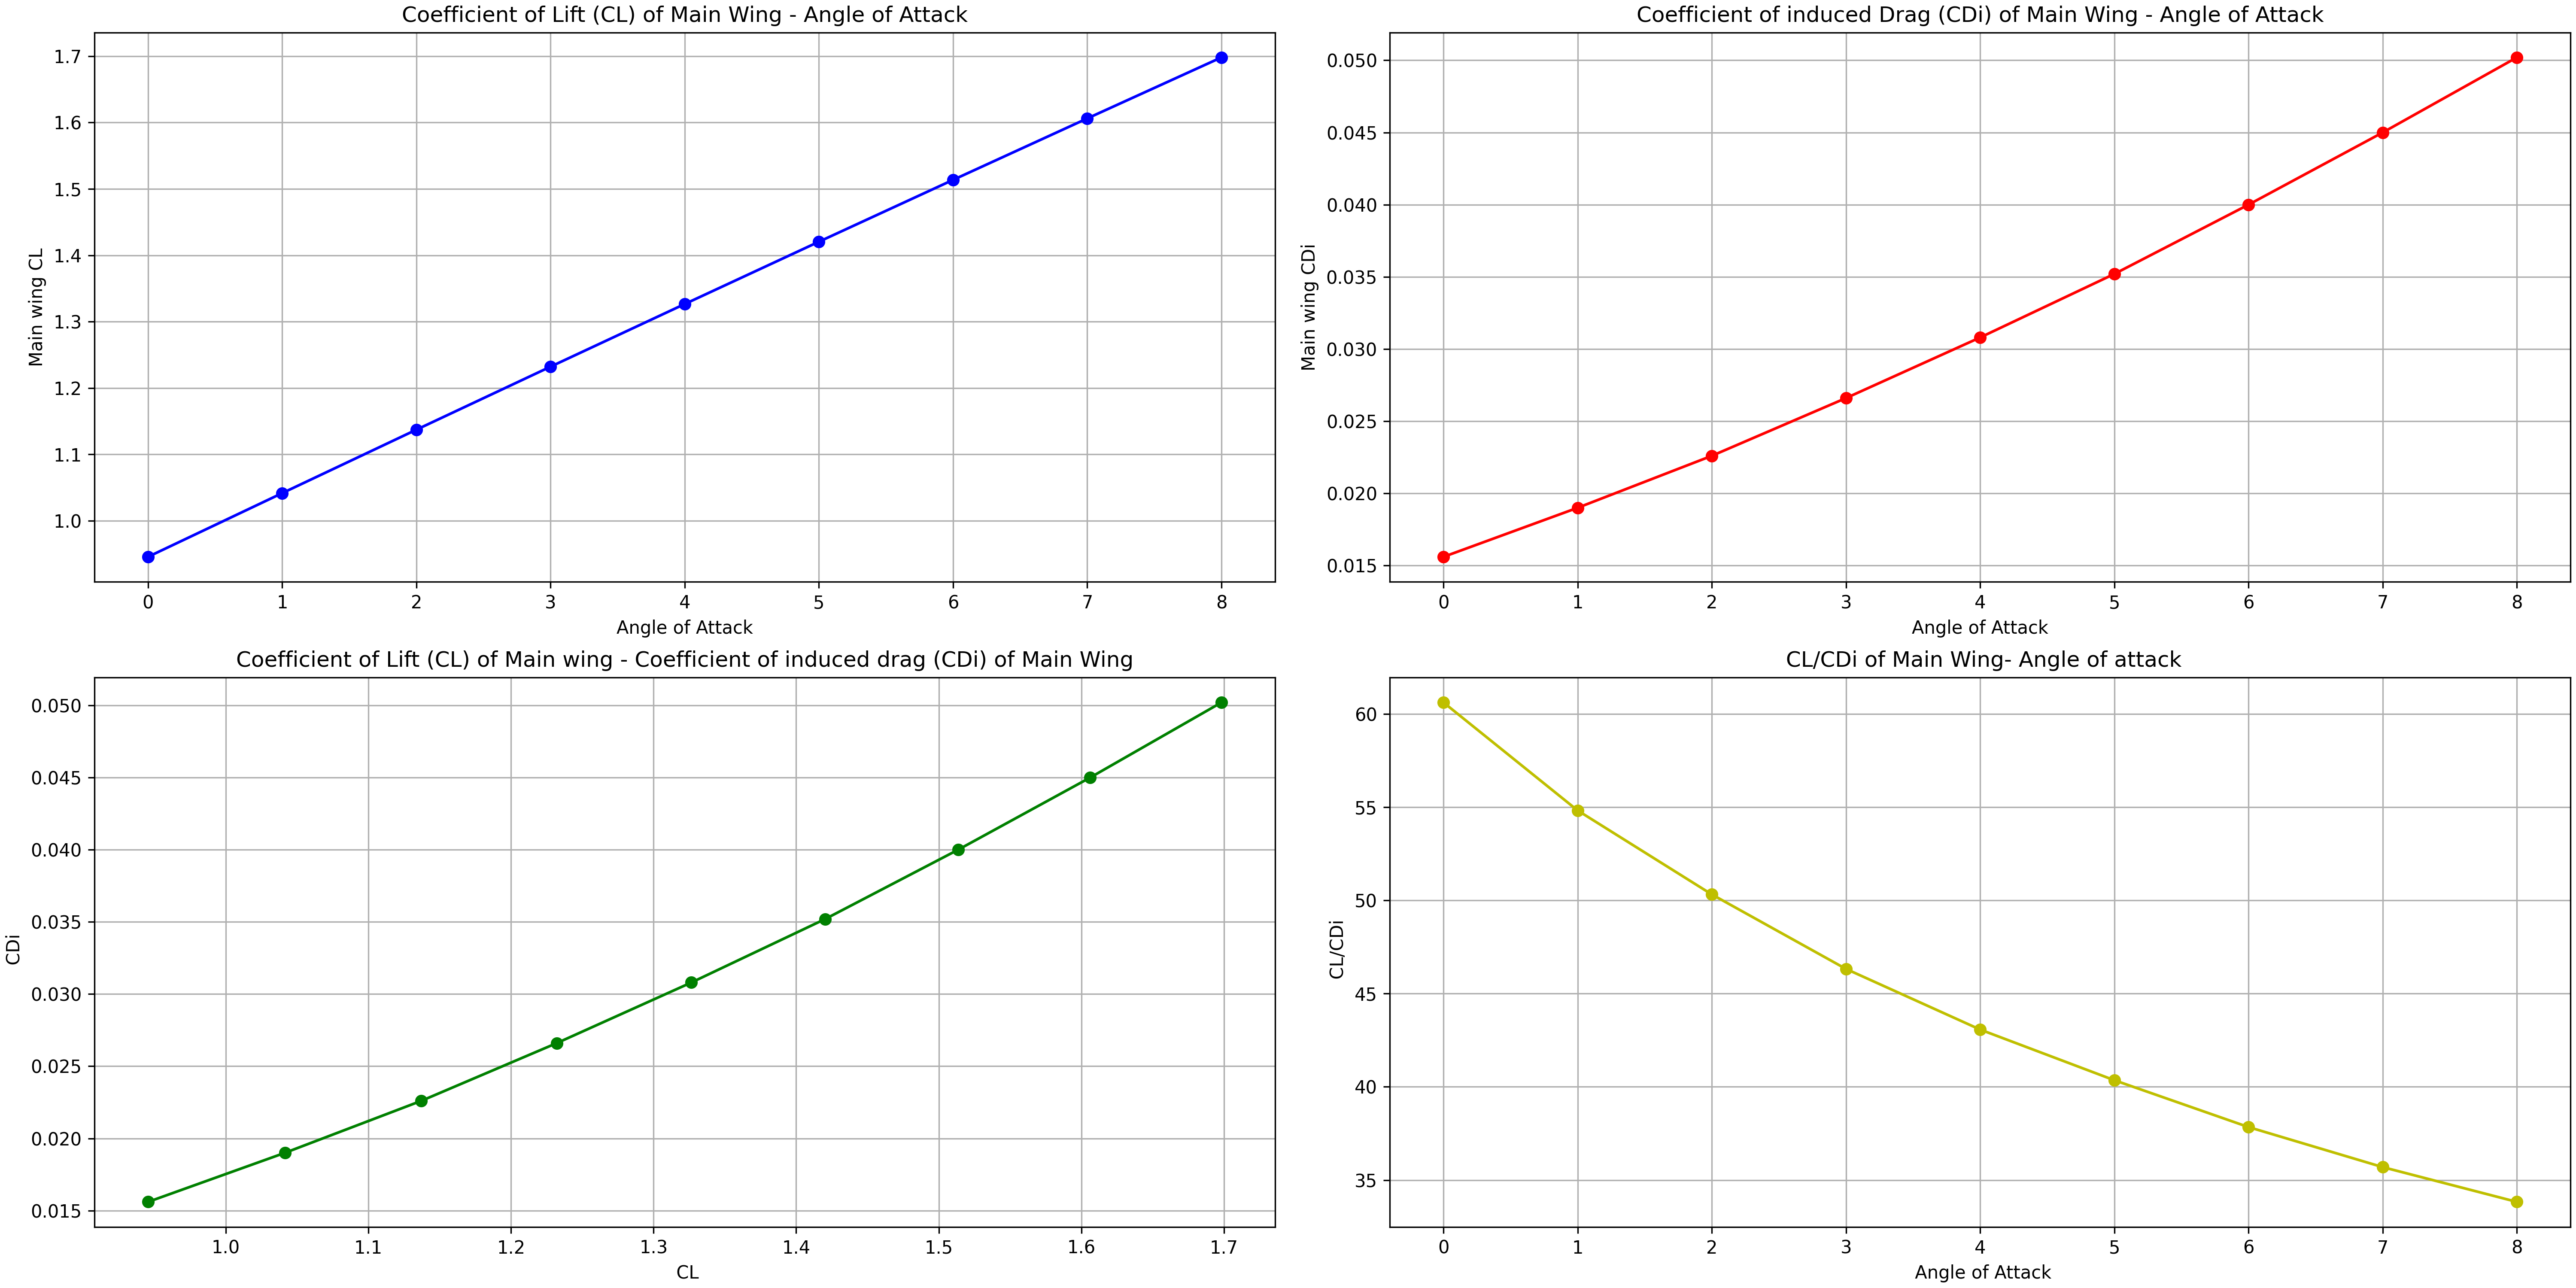